# Energy usage prediction of houses

Author: Ramy Ghorayeb

Data available [here](https://github.com/deKeijzer/Multivariate-time-series-models-in-Keras/tree/master/data])

## Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [98]:
data = pd.read_csv('data/house_data.csv', delimiter='\t', parse_dates=['datetime'])
data = data.set_index(['datetime'])

In [99]:
data.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,RG,SQ,T,T10,TD,U,VV,WW,dwelling,gasPower
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,307.44101,305.450012,0.0,5.341667,...,0.0,7.631617,8.733334,9.133333,4.883333,76.500000,31916.666016,1.333333,P01S01W7548,NaN
2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.44101,288.200012,0.0,5.418334,...,0.0,10.000000,9.116667,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.0
2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.44101,285.866669,0.0,4.593333,...,0.0,2.936100,7.866667,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.0
2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.44101,286.633331,0.0,3.783333,...,0.0,5.000000,7.066667,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.0
2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.44101,278.783325,0.0,2.741667,...,0.0,0.000000,6.616667,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115931 entries, 2017-03-07 15:00:00 to 2017-11-22 11:00:00
Data columns (total 24 columns):
eMeter             106765 non-null float64
eMeterReturn       106765 non-null float64
eMeterLow          106765 non-null float64
eMeterLowReturn    106765 non-null float64
ePower             106765 non-null float64
ePowerReturn       106765 non-null float64
gasMeter           106685 non-null float64
DD                 115843 non-null float64
DR                 115876 non-null float64
FF                 115843 non-null float64
FX                 115843 non-null float64
N                  115667 non-null float64
P                  115845 non-null float64
Q                  115876 non-null float64
RG                 115876 non-null float64
SQ                 115876 non-null float64
T                  115876 non-null float64
T10                115876 non-null float64
TD                 115876 non-null float64
U                  115876 non-null flo

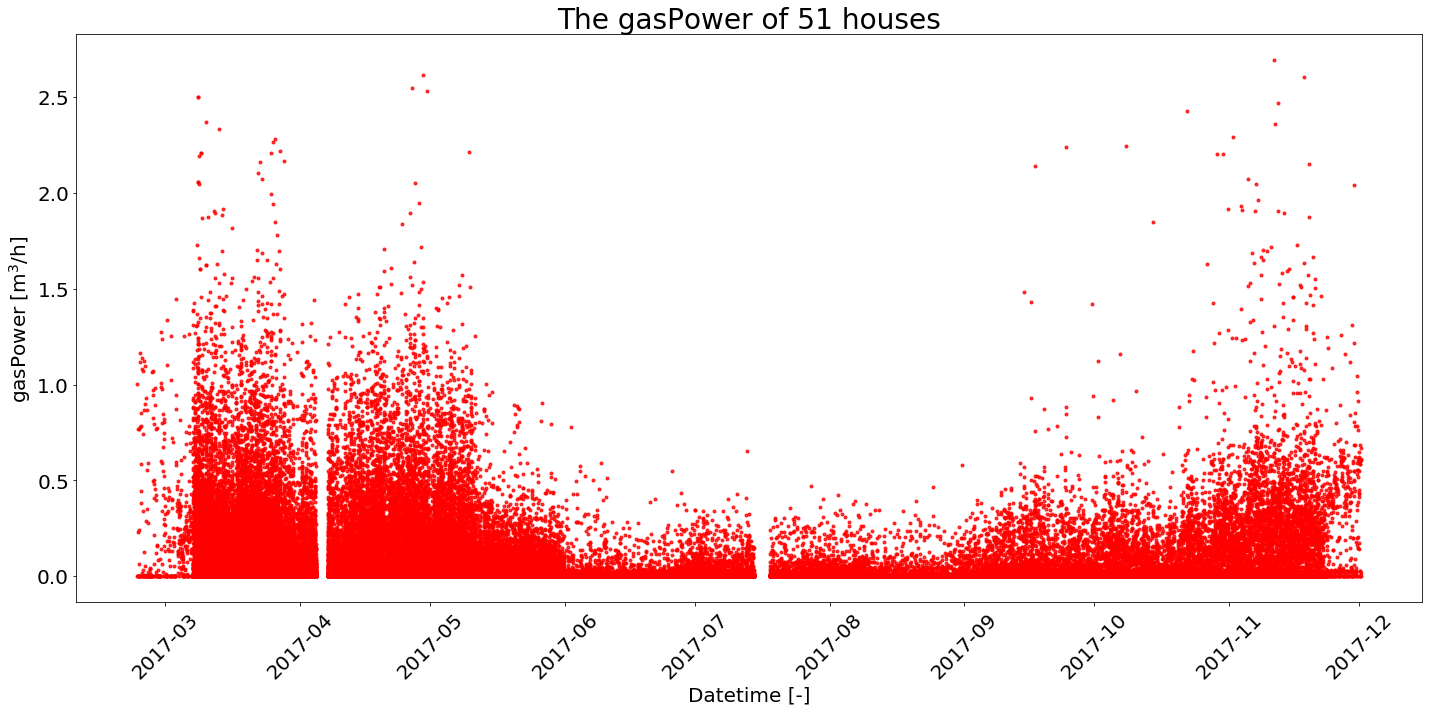

In [101]:
# Plotting the target: gasPower

plt.figure(figsize=(20,10))

plt.plot(data.index, data['gasPower'], '.', color='red', label='Original data', alpha=0.8)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'gasPower [m$^3$/h]', fontsize=20)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('The gasPower of 51 houses', fontsize=28)

plt.tight_layout()

We can notice that the standard deviation is very high and that some periods are missing.

## Preprocessing

In [102]:
data.isnull().sum()

eMeter              9166
eMeterReturn        9166
eMeterLow           9166
eMeterLowReturn     9166
ePower              9166
ePowerReturn        9166
gasMeter            9246
DD                    88
DR                    55
FF                    88
FX                    88
N                    264
P                     86
Q                     55
RG                    55
SQ                    55
T                     55
T10                   55
TD                    55
U                     55
VV                    55
WW                    55
dwelling               0
gasPower           10156
dtype: int64

### Drop missing value

Let's drop the missing data (only 10k in 115k) as we have no good way of interpolating the missing data.

In [103]:
data = data.dropna()

In [104]:
data['month'] = data.index.month
data['day']= data.index.day
data['hour']= data.index.hour

In [105]:
data.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,DD,DR,FF,...,T10,TD,U,VV,WW,dwelling,gasPower,month,day,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-07 16:00:00,625.401001,0.0,359.501007,0.0,383.994446,0.0,307.441010,288.200012,0.0,5.418334,...,10.750000,5.416667,77.166664,23800.000000,2.666667,P01S01W7548,0.000000,3,7,16
2017-03-07 17:00:00,625.679993,0.0,359.501007,0.0,277.722229,0.0,307.441010,285.866669,0.0,4.593333,...,8.450000,4.550000,78.833336,22233.333984,1.000000,P01S01W7548,0.000000,3,7,17
2017-03-07 18:00:00,625.820984,0.0,359.501007,0.0,143.624283,0.0,307.441010,286.633331,0.0,3.783333,...,6.816667,4.433333,82.833336,20266.666016,2.500000,P01S01W7548,0.000000,3,7,18
2017-03-07 19:00:00,625.963013,0.0,359.501007,0.0,143.376038,0.0,307.441010,278.783325,0.0,2.741667,...,6.016667,4.300000,84.666664,17433.333984,2.833333,P01S01W7548,0.000000,3,7,19
2017-03-07 20:00:00,626.458984,0.0,359.501007,0.0,499.144440,0.0,307.544006,245.816666,0.0,3.418333,...,6.183333,3.716667,81.333336,21733.333984,2.000000,P01S01W7548,0.102997,3,7,20


### Drop features

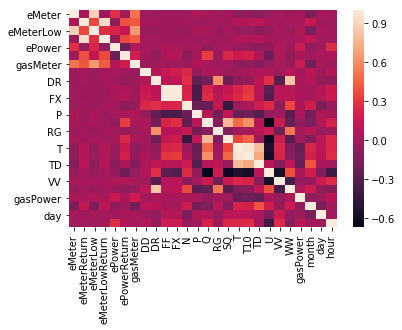

In [106]:
sns.heatmap(data.corr())

We remove the corerlated features:

In [107]:
# Not needed
data = data.drop(['dwelling'], axis=1)
# Drop weather columns which contain correlated/double information. e.g. T, T10, TD are all three temperature columns.
data = data.drop(['WW', 'VV', 'P', 'DR', 'SQ', 'TD', 'T10', 'FX'], axis=1)
data = data.drop(['eMeterLowReturn','eMeterLow'], axis=1)

# Drop this to make multi step a head forecasting easier
data = data.drop(['ePowerReturn', 'ePower'], axis=1)

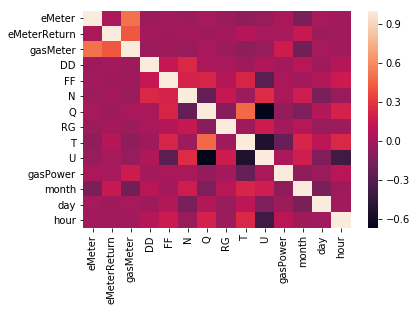

In [108]:
sns.heatmap(data.corr())

### Standardization

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data)
data_n = scaler.transform(data)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [130]:
data_n_pd = pd.DataFrame(data_n,columns = data.columns)

In [176]:
data_n_pd['month'] = data.index.month
data_n_pd['day']= data.index.day
data_n_pd['hour']= data.index.hour

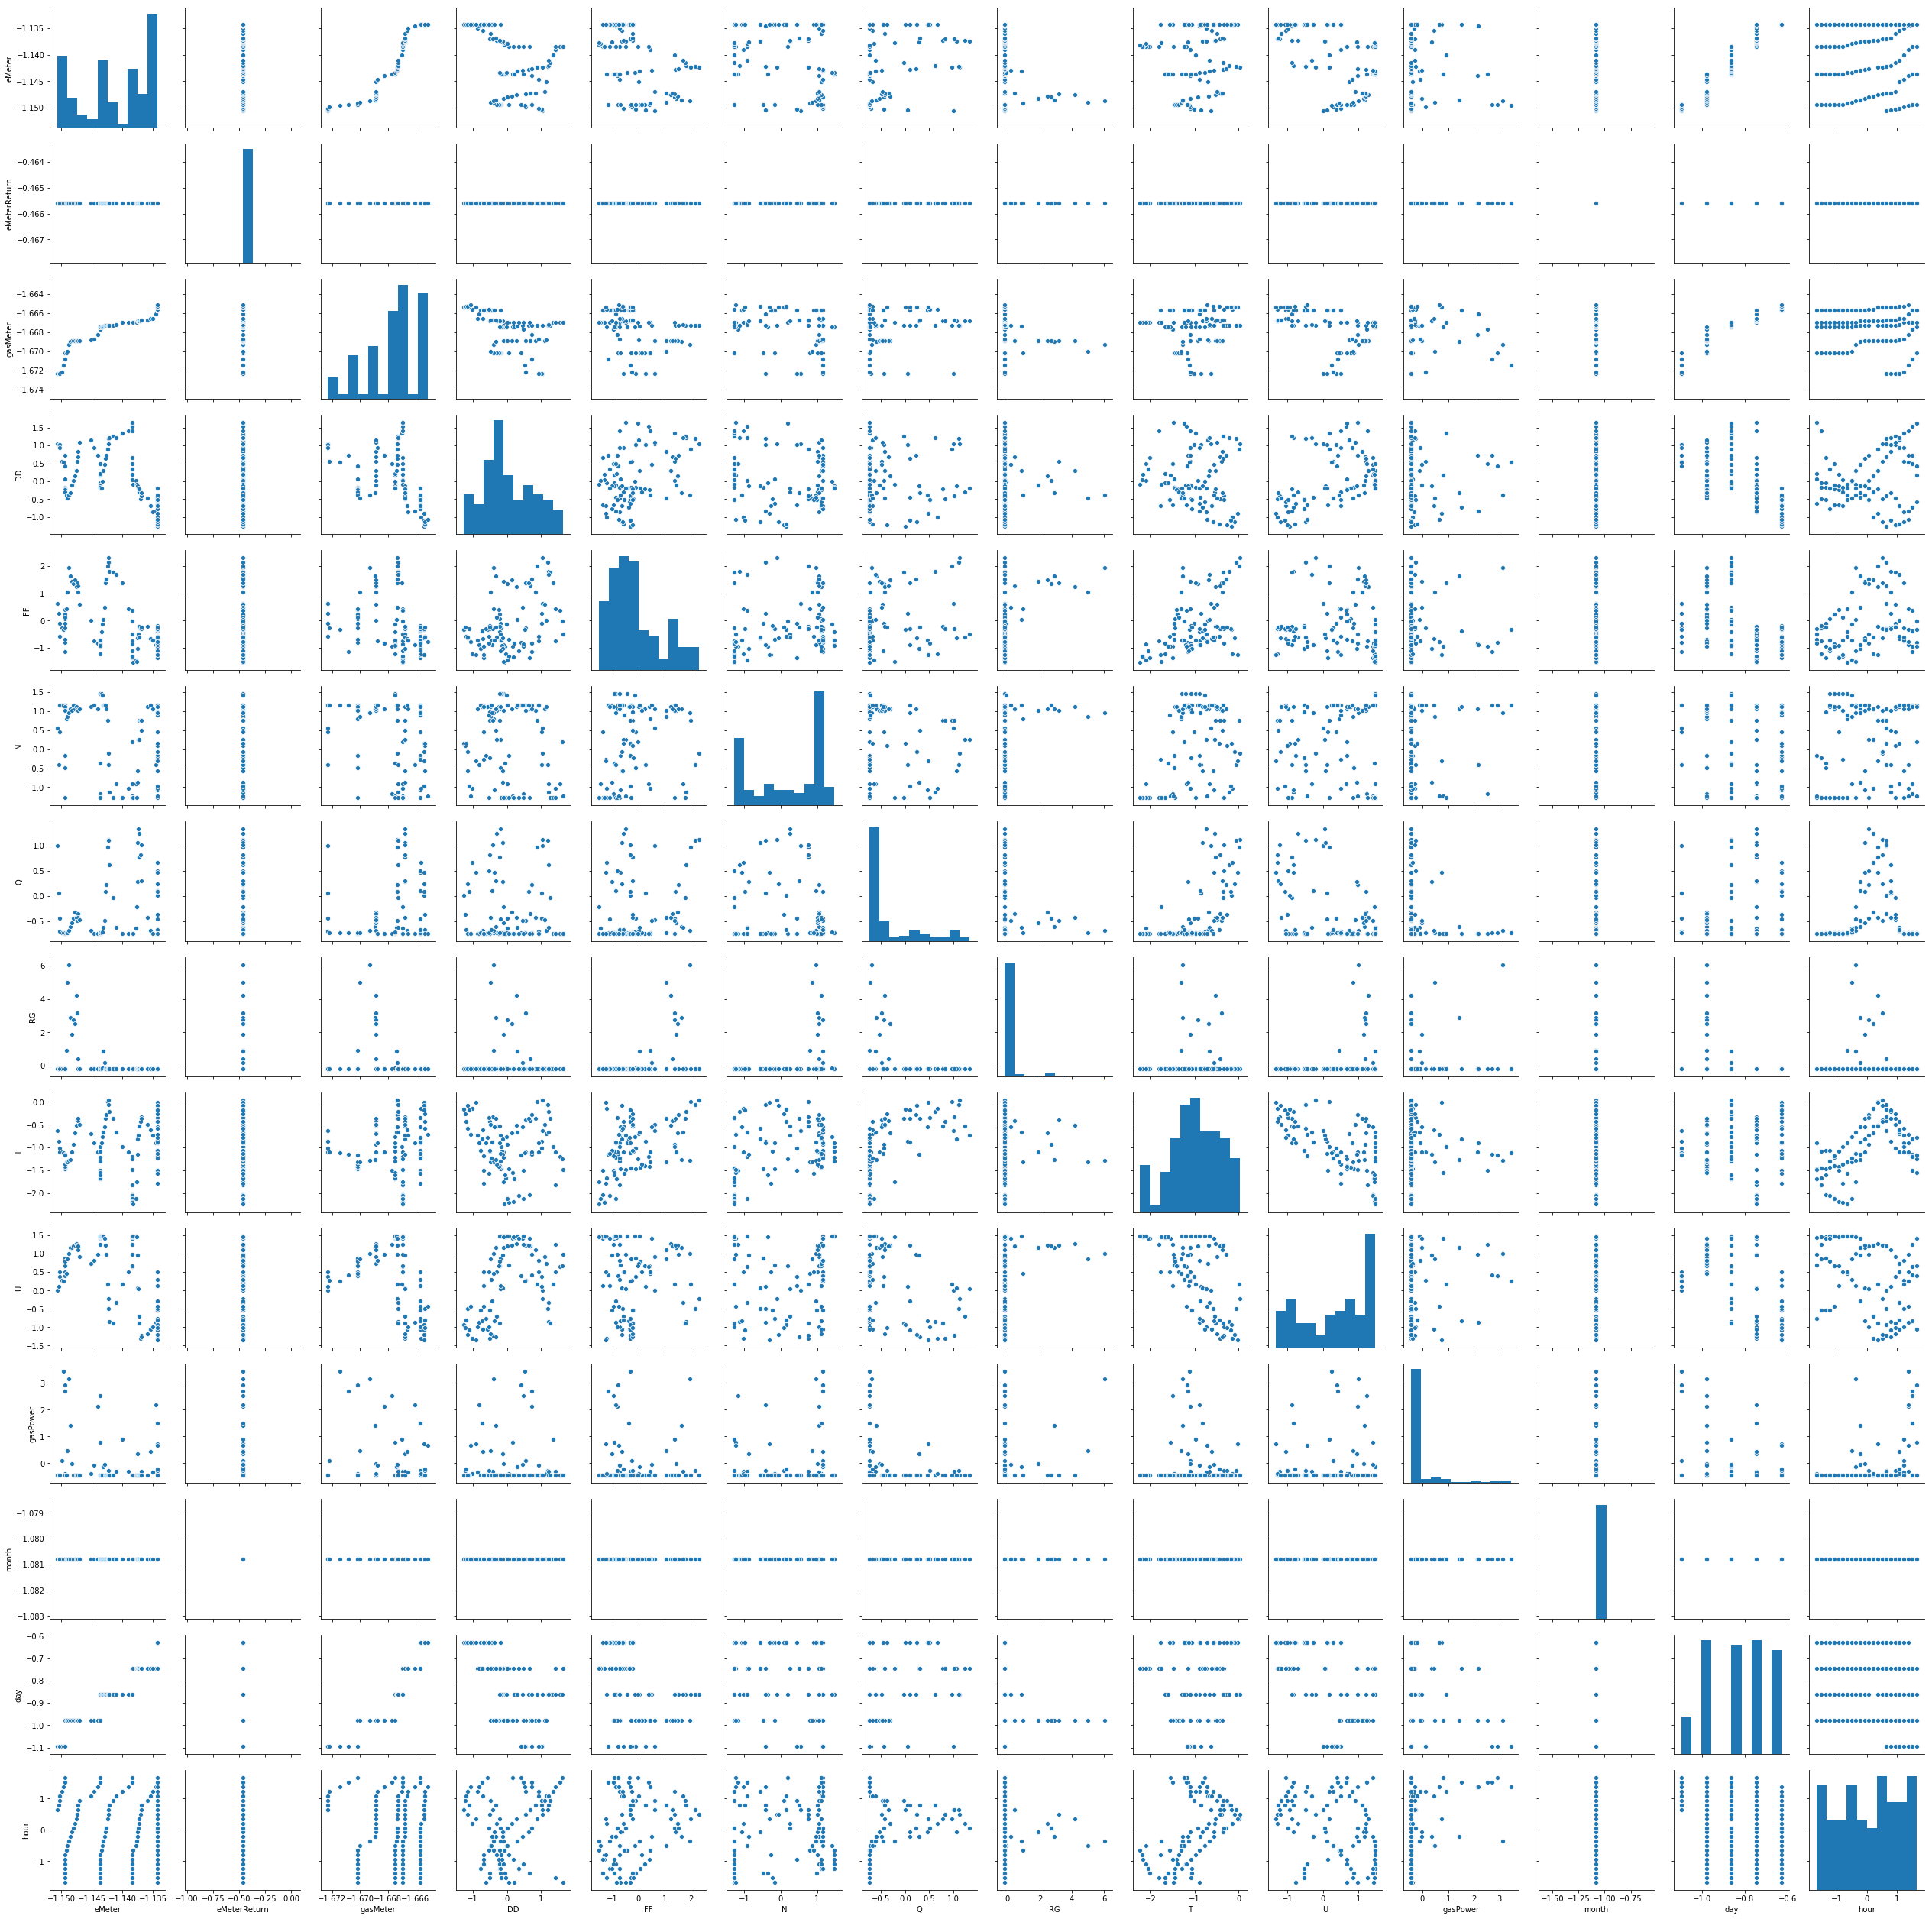

In [135]:
sns.pairplot(data_n_pd.loc[:100])

### One-hot encoding

In [177]:
X = data_n_pd.drop(['gasPower'],axis=1)
y = data_n_pd['gasPower']

In [178]:
X.nunique()

eMeter          44247
eMeterReturn     9445
gasMeter        61454
DD               5578
FF               4231
N                 112
Q                2327
RG                279
T                2026
U                 574
month              11
day                31
hour               24
dtype: int64

In [179]:
X[['month','day','hour']] = X[['month','day','hour']].astype('category')

In [180]:
X = pd.get_dummies(X)

In [181]:
X.columns

Index(['eMeter', 'eMeterReturn', 'gasMeter', 'DD', 'FF', 'N', 'Q', 'RG', 'T',
       'U', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_1',
       'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8', 'day_9',
       'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15', 'day_16',
       'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22', 'day_23',
       'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29', 'day_30',
       'day_31', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

## Linear Regression Model

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [242]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.18481524839013208

In [243]:
coef = []
for i in range(len(X.columns)):
    coef.append([X.columns[i],model.coef_[i]])
coef = np.array(coef)

In [246]:
coef.sort(axis=0)

In [251]:
coef

array([['DD', '-0.01982209824707009'],
       ['FF', '-0.02561424293949524'],
       ['N', '-0.03629835206756095'],
       ['Q', '-0.03929464287509743'],
       ['RG', '-0.07795766892887475'],
       ['T', '-0.1985532020084887'],
       ['U', '-111601754.05503492'],
       ['day_1', '-111601754.08717524'],
       ['day_10', '-111601754.0994028'],
       ['day_11', '-111601754.11967754'],
       ['day_12', '-111601754.13415575'],
       ['day_13', '-111601754.13883972'],
       ['day_14', '-111601754.15537643'],
       ['day_15', '-111601754.1581882'],
       ['day_16', '-111601754.15892147'],
       ['day_17', '-111601754.1595459'],
       ['day_18', '-111601754.16108267'],
       ['day_19', '-111601754.16334534'],
       ['day_2', '-111601754.16366959'],
       ['day_20', '-111601754.16594963'],
       ['day_21', '-111601754.17390737'],
       ['day_22', '-111601754.17489934'],
       ['day_23', '-111601754.1762352'],
       ['day_24', '-111601754.18349648'],
       ['day_25', '-11160

In [269]:
y.std()

1.0000047421576346

In [ ]:
# Plotting the target: gasPower

plt.figure(figsize=(20,10))

plt.plot(y, '.-', color='red', label='Original data', alpha=0.5)
plt.plot(model.predict(X), '.-', color='blue', label='Predicted data', alpha=1)
plt.xlabel('Datetime [-]', fontsize=20)
plt.ylabel(r'gasPower [m$^3$/h]', fontsize=20)
plt.legend()

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

plt.title('The gasPower of 51 houses', fontsize=28)

plt.tight_layout()

86539   -0.452504
30881   -0.452504
80265   -0.380354
37292    0.028493
70387   -0.452504
65949   -0.452504
84021   -0.403068
70403   -0.452504
71872   -0.452504
33805   -0.452504
365     -0.436136
41629   -0.398392
86737   -0.452504
36482    0.252958
16739   -0.414425
24391    0.625731
34314   -0.452504
55629   -0.392379
81166   -0.392296
2710    -0.370333
26015   -0.212005
51071   -0.452504
23024   -0.452504
66632    4.565897
29       2.130516
68436   -0.392379
96406    2.223709
6237    -0.364989
37165   -0.452504
28691   -0.452504
           ...   
81085   -0.392296
86605   -0.452504
26081   -0.452504
70298   -0.271963
46225   -0.452504
92013   -0.408412
20232   -0.375010
92214    0.493457
8917    -0.409080
42434   -0.260773
57583    2.130850
87297   -0.452504
15549   -0.452504
18578   -0.403068
8987    -0.414425
4347    -0.452504
72483   -0.452504
2093    -0.452504
85538   -0.452504
21018   -0.408412
27878   -0.452504
10315   -0.376346
63037   -0.205993
13732    0.028493
41594    0